In [142]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def step(clip, start, stop, minimum):
    length = stop - start
    edit = np.repeat(minimum,length)
    clip[start:stop] = edit
    return(clip)


def smooth(start,stop, minimum,percentile, clip, outer_start, outer_stop):

    editinds = range(outer_start, outer_stop)
    mean = (start + stop) / 2
    z = st.norm.ppf(percentile)
    sigma = (stop - start) / (2*z)
    rescale = st.norm.pdf(mean, loc = mean ,scale = sigma) / (1 - minimum)
    clip[editinds] = 1 - st.norm.pdf(editinds, loc = mean ,scale = sigma) / rescale
    return(clip)

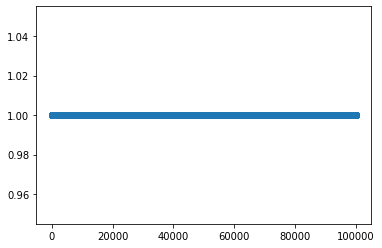

In [143]:
n = 100000
clip = np.ones(n)
plt.scatter(list(range(n)), clip)

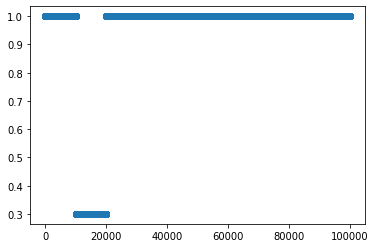

In [144]:
start = 10000
stop = 20000
minimum = .3
step_clip = step(clip, start, stop, minimum)
plt.scatter(list(range(n)), step_clip)

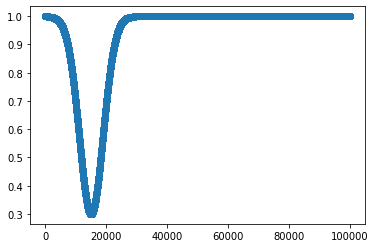

In [145]:
outer_start = 0
outer_stop = n
percentile = .9
smooth_clip = smooth(start,stop, minimum,percentile, clip, outer_start, outer_stop)
plt.scatter(list(range(n)), smooth_clip)